In [28]:
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings as war
war.filterwarnings('ignore')

In [ ]:
'''

project name : handwritten digit classification --deep learning
author : @kanishksh4rma

'''

In [4]:
#load the data

(X_train,y_train),(X_test,y_test) = mnist.load_data()

#print the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


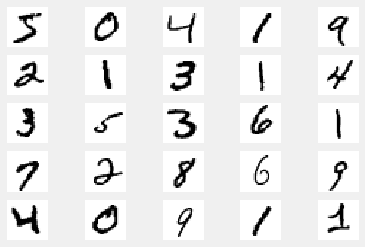

In [6]:
#lets print the data

fig,ax = plt.subplots(5,5)
for i,axs in enumerate(ax.flat):
  axs.imshow(X_train[i],cmap='binary',interpolation = 'nearest')
  axs.set_xticks([])
  axs.set_yticks([])
  axs.axis('off')

# Deep learning

In [5]:
#import deep learning stuff

from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.utils.np_utils import to_categorical

In [6]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28,28,1))
X_test = X_test.reshape((X_test.shape[0], 28, 28,1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#one hot encoder for y
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
#create model

model = Sequential()
input_shape=(28,28,1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                              input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
#fit the model
model.fit(X_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 175s 3ms/step - loss: 0.1040 - accuracy: 0.9690
Epoch 2/3
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0745 - accuracy: 0.9773
Epoch 3/3
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0593 - accuracy: 0.9814


In [27]:
#testify the validity

result = model.evaluate(X_test,y_test)
print('Accuracy : {} %'.format(round(result[1]*100,1)))

10000/10000 [==============================] - 6s 596us/step
Accuracy : 99.0 %
